In [9]:
import os
import logging
import pyxdf
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
from scipy.fft import fftshift

#path = '/Users/admin/Documents/CurrentStudy/sub-P001/ses-S002/eeg'
#path = '/Users/admin/Desktop/sub-P001/ses-S001/eeg'
path = '/Users/admin/Desktop/LSL_Data/sub-P001/ses-S001/eeg' # write directory towards xdf file
logging.basicConfig(level=logging.DEBUG)  # Use logging.INFO to reduce output.
#fname = os.path.abspath(os.path.join(os.path.dirname(path),'eeg', 'StringTest.xdf'))
#fname = os.path.abspath(os.path.join(os.path.dirname(path),'Desktop', 'sub-P001_ses-S001_task-T1_run-001_eeg.xdf'))
filename = 'sub-P001_ses-S001_task-T1_acq-Rayla_Desk_SR1000_Ch16_Py_run-001_eeg.xdf'
fname = os.path.abspath(os.path.join(os.path.dirname(path),'eeg', filename))
print(fname)
streams, fileheader = pyxdf.load_xdf(fname)

print("Found {} streams:".format(len(streams)))
for ix, stream in enumerate(streams):
    print("Stream {}: {} - type {} - uid {} - shape {} at {} Hz (effective {} Hz)".format(
        ix + 1, stream['info']['name'][0],
        stream['info']['type'][0],
        stream['info']['uid'][0],
        (int(stream['info']['channel_count'][0]), len(stream['time_stamps'])),
        stream['info']['nominal_srate'][0],
        stream['info']['effective_srate'])
    )
    if any(stream['time_stamps']):
        print("\tDuration: {} s".format(stream['time_stamps'][-1] - stream['time_stamps'][0]))
print("Done.")

INFO:pyxdf.pyxdf:Importing XDF file C:\Users\admin\Desktop\LSL_Data\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-T1_acq-Rayla_Desk_SR1000_Ch16_Py_run-001_eeg.xdf...
DEBUG:pyxdf.pyxdf: Read tag: 1 at 8 bytes, length=58
DEBUG:pyxdf.pyxdf: Read tag: 2 at 71 bytes, length=645, StreamId=1
DEBUG:pyxdf.pyxdf:  found stream OpenBCIEEG1
DEBUG:pyxdf.pyxdf: Read tag: 3 at 718 bytes, length=84, StreamId=1
DEBUG:pyxdf.pyxdf:  reading [16,1]
DEBUG:pyxdf.pyxdf: Read tag: 3 at 807 bytes, length=887, StreamId=1
DEBUG:pyxdf.pyxdf:  reading [16,12]
DEBUG:pyxdf.pyxdf: Read tag: 3 at 1699 bytes, length=9136, StreamId=1
DEBUG:pyxdf.pyxdf:  reading [16,125]
DEBUG:pyxdf.pyxdf: Read tag: 3 at 10840 bytes, length=9209, StreamId=1
DEBUG:pyxdf.pyxdf:  reading [16,126]
DEBUG:pyxdf.pyxdf: Read tag: 3 at 20054 bytes, length=9136, StreamId=1
DEBUG:pyxdf.pyxdf:  reading [16,125]
DEBUG:pyxdf.pyxdf: Read tag: 3 at 29195 bytes, length=8990, StreamId=1
DEBUG:pyxdf.pyxdf:  reading [16,123]
DEBUG:pyxdf.pyxdf: Read tag: 3 at

C:\Users\admin\Desktop\LSL_Data\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-T1_acq-Rayla_Desk_SR1000_Ch16_Py_run-001_eeg.xdf


DEBUG:pyxdf.pyxdf:  reading [16,126]
DEBUG:pyxdf.pyxdf: Read tag: 3 at 521728 bytes, length=9136, StreamId=1
DEBUG:pyxdf.pyxdf:  reading [16,125]
DEBUG:pyxdf.pyxdf: Read tag: 3 at 530869 bytes, length=9063, StreamId=1
DEBUG:pyxdf.pyxdf:  reading [16,124]
DEBUG:pyxdf.pyxdf: Read tag: 3 at 539937 bytes, length=9063, StreamId=1
DEBUG:pyxdf.pyxdf:  reading [16,124]
DEBUG:pyxdf.pyxdf: Read tag: 5 at 549002 bytes, length=18
DEBUG:pyxdf.pyxdf: Read tag: 3 at 549025 bytes, length=8990, StreamId=1
DEBUG:pyxdf.pyxdf:  reading [16,123]
DEBUG:pyxdf.pyxdf: Read tag: 4 at 558017 bytes, length=22, StreamId=1
DEBUG:pyxdf.pyxdf: Read tag: 3 at 558044 bytes, length=9136, StreamId=1
DEBUG:pyxdf.pyxdf:  reading [16,125]
DEBUG:pyxdf.pyxdf: Read tag: 3 at 567185 bytes, length=9209, StreamId=1
DEBUG:pyxdf.pyxdf:  reading [16,126]
DEBUG:pyxdf.pyxdf: Read tag: 3 at 576399 bytes, length=9136, StreamId=1
DEBUG:pyxdf.pyxdf:  reading [16,125]
DEBUG:pyxdf.pyxdf: Read tag: 3 at 585540 bytes, length=9209, StreamId=1


DEBUG:pyxdf.pyxdf:  reading [16,123]
DEBUG:pyxdf.pyxdf: Read tag: 3 at 1151391 bytes, length=9136, StreamId=1
DEBUG:pyxdf.pyxdf:  reading [16,125]
DEBUG:pyxdf.pyxdf: Read tag: 3 at 1160532 bytes, length=8990, StreamId=1
DEBUG:pyxdf.pyxdf:  reading [16,123]
DEBUG:pyxdf.pyxdf: Read tag: 3 at 1169527 bytes, length=9136, StreamId=1
DEBUG:pyxdf.pyxdf:  reading [16,125]
DEBUG:pyxdf.pyxdf: Read tag: 3 at 1178668 bytes, length=9209, StreamId=1
DEBUG:pyxdf.pyxdf:  reading [16,126]
DEBUG:pyxdf.pyxdf: Read tag: 3 at 1187882 bytes, length=9136, StreamId=1
DEBUG:pyxdf.pyxdf:  reading [16,125]
DEBUG:pyxdf.pyxdf: Read tag: 4 at 1197020 bytes, length=22, StreamId=1
DEBUG:pyxdf.pyxdf: Read tag: 3 at 1197047 bytes, length=9209, StreamId=1
DEBUG:pyxdf.pyxdf:  reading [16,126]
DEBUG:pyxdf.pyxdf: Read tag: 3 at 1206261 bytes, length=9136, StreamId=1
DEBUG:pyxdf.pyxdf:  reading [16,125]
DEBUG:pyxdf.pyxdf: Read tag: 3 at 1215402 bytes, length=8990, StreamId=1
DEBUG:pyxdf.pyxdf:  reading [16,123]
DEBUG:pyxdf.

DEBUG:pyxdf.pyxdf: Read tag: 6 at 1772209 bytes, length=1832, StreamId=1
INFO:pyxdf.pyxdf:  reached end of file.
INFO:pyxdf.pyxdf:  performing clock synchronization...
INFO:pyxdf.pyxdf:  performing jitter removal...


Found 1 streams:
Stream 1: OpenBCIEEG1 - type EEG - uid 955281f8-b711-4e92-b098-6a34cfffacff - shape (16, 24215) at 1000.000000000000 Hz (effective 249.5211979594394 Hz)
	Duration: 97.04486302898476 s
Done.


In [10]:
## Initialize Variables ##
select_stream = 0 # select the stream (Please look at this)
stream = streams[select_stream] # get selected stream
Fs = stream['info']['effective_srate'] # get the effective sampling rate
select_channel = 1 # select one channel. This is for single plots
N = int(stream['footer']['info']['sample_count'][0]) # get number of samples
channum = int(stream['info']['channel_count'][0]) # get number of channels
data_Y = stream['time_series'] # get time series data
data_X = stream['time_stamps'] # get time stamp data
#path_save = '/Users/admin/Desktop/LSL_Data/sub-P001/ses-S001/eeg'

## Trim Data ##
if False: # change to true if you do want to trim data
    startidx = 0; # start idx of trim
    endidx = 10000; # end idx of trim
    trimrange = list(range(startidx,endidx)) # create list from start and end idx
    data_Y = data_Y[trimrange,:] # new data
    data_X = data_X[trimrange] # end data

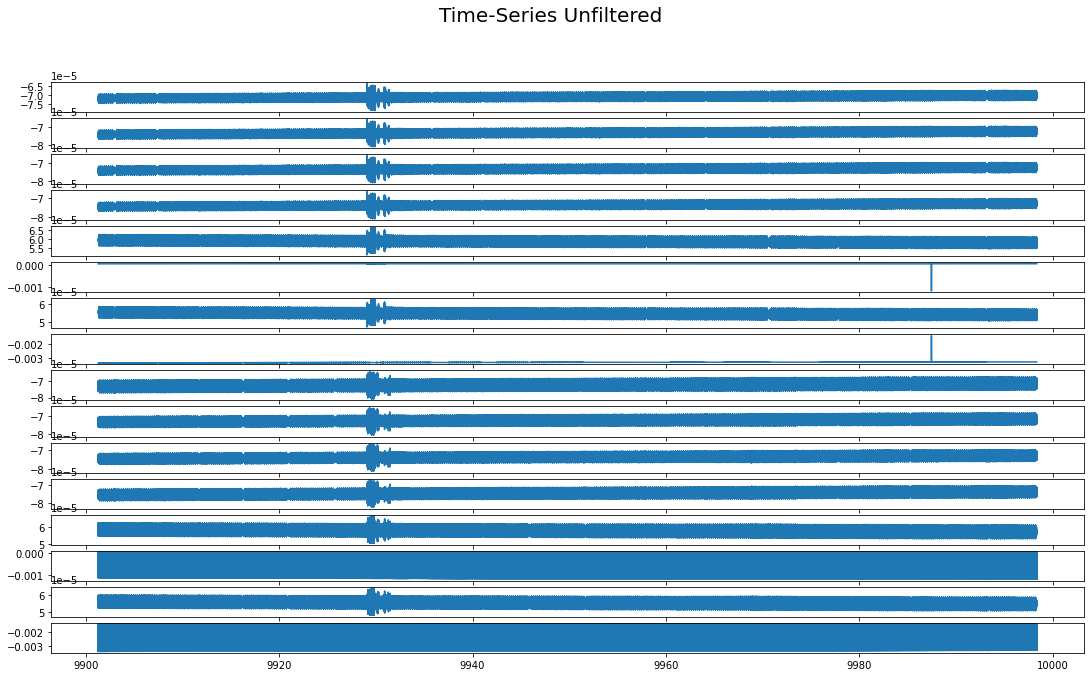

In [11]:
## Plot Time-Series Unfiltered ##
fig, axs = plt.subplots(channum)
for i in range(channum):
    axs[i].plot(data_X, data_Y[:,i])
    
fig.suptitle('Time-Series Unfiltered', fontsize=20)
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png',format='jpg')
#plt.close(fig)

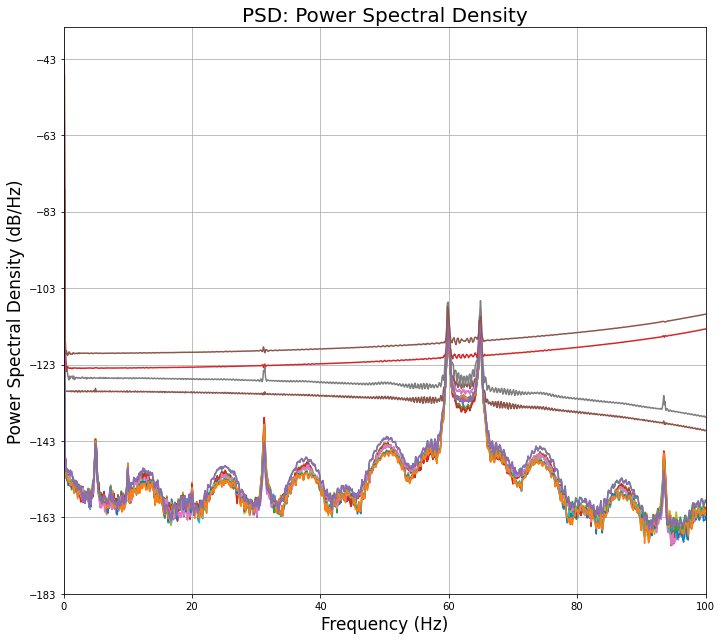

In [12]:
## PSD Unfiltered ##
plt.figure(figsize=(10, 9));
for i in range(channum):
    plt.psd(data_Y[:,i],NFFT=round(N/10),Fs=Fs);

plt.title('PSD: Power Spectral Density',fontsize=20);
plt.xlabel('Frequency (Hz)',fontsize=17);
plt.ylabel('Power Spectral Density (dB/Hz)',fontsize=17);
plt.tight_layout();
plt.xlim((0,100));
plt.show();

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=18.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) ob

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Goudy Old Style' (GOUDOSI.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Berlin Sans FB' (BRLNSB.TTF) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'SWGothi' (swgothi.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Candara' (Candarali.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bodoni MT' (BOD_B.TTF) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Niagara Solid' (NIAGSOL.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'SWComp' (swcomp.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Goudy Stout' (GOUDYSTO.TTF) normal no

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe MDL2 Assets' (segmdl2.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'OLF SimpleSansOC' (olfsimplesansoc-regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'MV Boli' (mvboli.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gill Sans MT' (GILI____.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Georgia' (georgiaz.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Edwardian Script ITC' (ITCEDSCR.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Rockwell' (ROCKB.TTF) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Tai Le' (taile.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'SWGothi' (swgothi.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 7.413636363636363
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft JhengHei' (msjhl.ttc) normal normal 290 normal>) = 10.1545
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bookman Old Style' (BOOKOSI.TTF) italic normal 300 normal>) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Courier10 BT' (CoureBI.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Bright' (LBRITED.TTF) normal normal 600 normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font '

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bernard MT Condensed' (BERNHC.TTF) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bauhaus 93' (BAUHS93.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Goudy Old Style' (GOUDOS.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tempus Sans ITC' (TEMPSITC.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Harrington' (HARNGTON.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Nirmala UI' (Nirmala.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal 700 normal>) = 3.9713636363636367
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Calibri' (calibrili.ttf) italic normal 300 normal>) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'S

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Nirmala UI' (NirmalaS.ttf) normal normal 350 normal>) = 10.0975
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (seguisbi.ttf) italic normal 600 normal>) = 11.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Eras Demi ITC' (ERASDEMI.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Century Gothic' (GOTHICI.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'SWItalc' (switalc.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Perpetua' (PERBI___.TTF) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'SWMath' (swmath.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft PhagsPa' (phagspab.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Palace Script MT' (PALSC

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Consolas' (consolab.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Elephant' (ELEPHNTI.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'SWRomns' (swromns.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe Script' (segoescb.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Old English Text MT' (OLDENGL.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Consolas' (consolab.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial' (ariblk.ttf) normal normal 900 normal>) = 6.888636363636364
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Britannic Bold' (BRITANIC.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Courier New' (c

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Freestyle Script' (FREESCPT.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'SWTxt' (swtxt.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Franklin Gothic Book' (FRABKIT.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Mongolian Baiti' (monbaiti.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gill Sans Ultra Bold Condensed' (GILLUBCD.TTF) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Perpetua' (PER_____.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Wingdings 2' (WINGDNG2.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kristen ITC' (ITCKRIST.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Colonna MT' (COLONNA.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Sans' (LSANSI.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Mistral' (MISTRAL.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Constantia' (constani.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Rage Italic' (RAGE.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Garamond' (GARABD.TTF) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (seguisb.ttf) normal normal 600 normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Cambria' (cambriaz.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial' (arialbi.ttf) italic normal 700 normal>) = 7.698636363636363
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Rockwell Extra Bold' (ROCKEB.TTF) normal normal 800 normal>) = 10.43
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal 350 normal>) = 10.0975
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Parchment' (PARCHM.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Courier Std' (courierstd-boldoblique.otf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Bright' (LBRITEI.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Myriad CAD' (myriadcad.otf) normal normal 250 normal>) = 10.1925
DEBUG:matplotlib.font_manager:findfont: scor

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Rockwell' (ROCKBI.TTF) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Century Schoolbook' (CENSCBK.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Engravers MT' (ENGR.TTF) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Times New Roman' (times.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial' (ARIALNB.TTF) normal normal 700 condensed>) = 6.8986363636363635
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Perpetua' (PERI____.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gill Sans MT' (GIL_____.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'MS Reference Specialty' (REFSPCL.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'V

DEBUG:matplotlib.font_manager:findfont: score(<Font 'OCR A Extended' (OCRAEXT.TTF) normal normal 400 expanded>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Swis721 BT' (SwissB.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'SWRomnc' (swromnc.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Colonna MT' (COLONNA.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Vladimir Script' (VLADIMIR.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Yi Baiti' (msyi.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Calligraphy' (LCALLIG.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Harlow Solid Italic' (HARLOWSI.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Nia

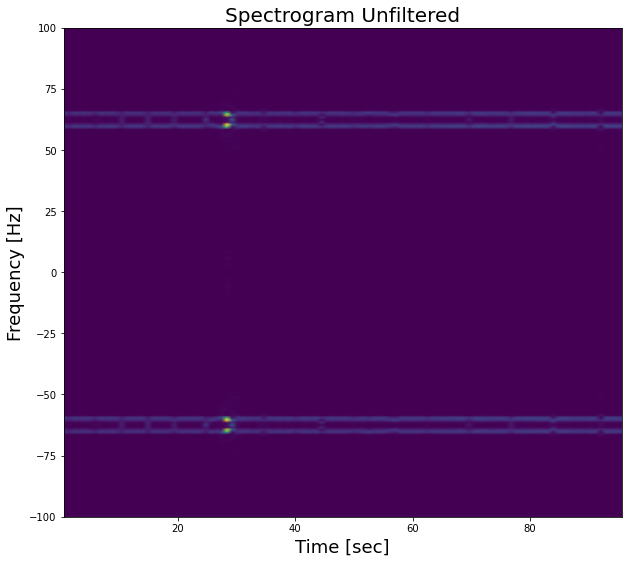

In [13]:
## Spectrogram Unfiltered ##
plt.figure(figsize=(10, 9));
freqs, time, Sxx = signal.spectrogram(data_Y[:,1], Fs,return_onesided=False)
plt.pcolormesh(time, fftshift(freqs), fftshift(Sxx,axes=0), shading='gouraud')
plt.title('Spectrogram Unfiltered',fontsize=20)
plt.ylabel('Frequency [Hz]',fontsize=18)
plt.xlabel('Time [sec]',fontsize=18)
plt.ylim((-100,100))
plt.show()

In [14]:
## Apply Filter ##

# Initialize Variables
F0 = 60.0  # Frequency to be removed from signal (Hz)
Q = 30.0  # Quality factor

# Design notch filter
b, a = signal.iirnotch(F0, Q, Fs)
fdata_Y = [] 

# Apply Filter
for i in range(channum):
    fdata_Y.append(signal.filtfilt(b,a,data_Y[:,i]))

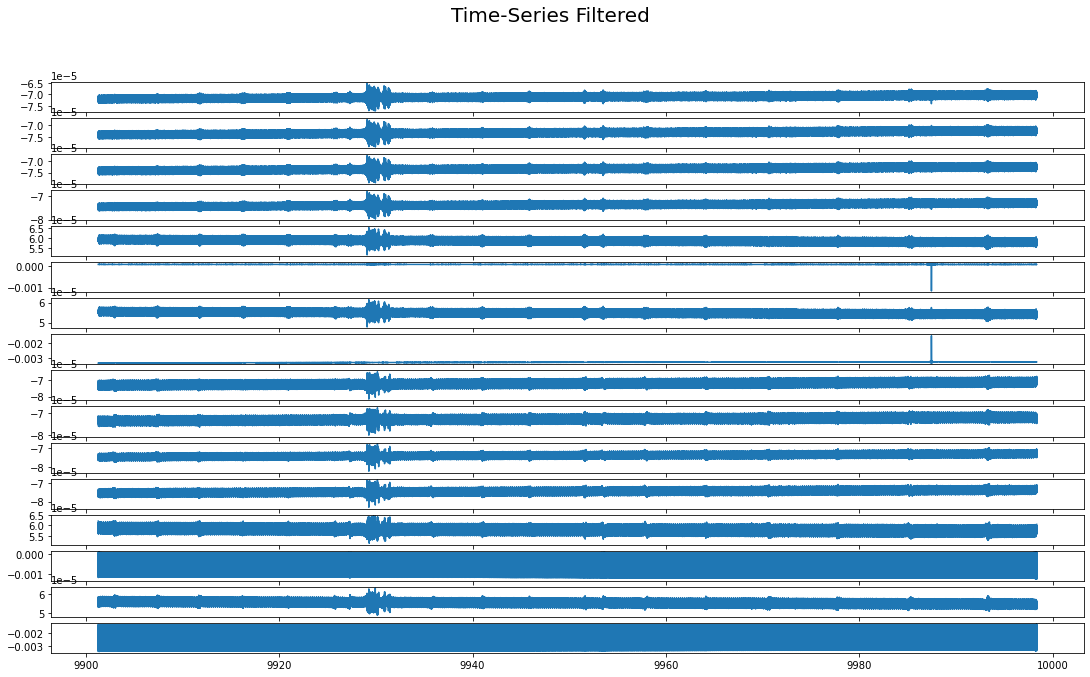

In [15]:
## Plot Time-Series Filtered ##
fig, axs = plt.subplots(channum) # define subplots

for i in range(channum):
    axs[i].plot(data_X, fdata_Y[i])
    
fig.suptitle('Time-Series Filtered', fontsize=20)
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png',format='jpg')
#plt.close(fig)

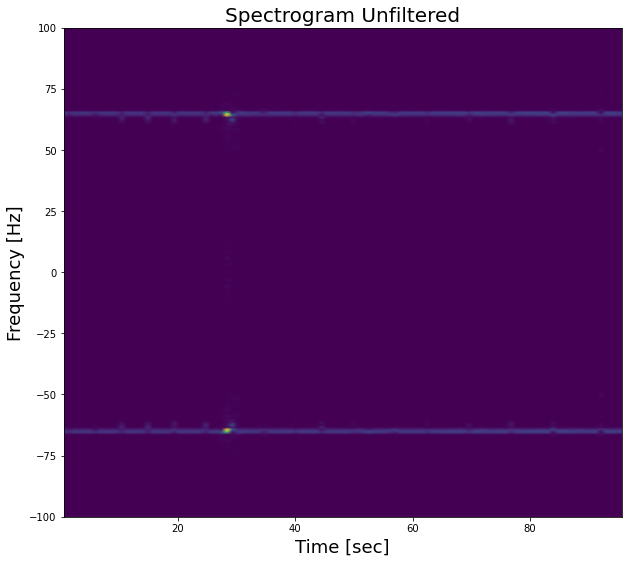

In [16]:
## Spectrogram Filtered ##
plt.figure(figsize=(10, 9));
freqs, time, Sxx = signal.spectrogram(fdata_Y[1], Fs,return_onesided=False)
plt.pcolormesh(time, fftshift(freqs), fftshift(Sxx,axes=0), shading='gouraud')
plt.title('Spectrogram Unfiltered',fontsize=20)
plt.ylabel('Frequency [Hz]',fontsize=18)
plt.xlabel('Time [sec]',fontsize=18)
plt.ylim((-100,100))
plt.show()

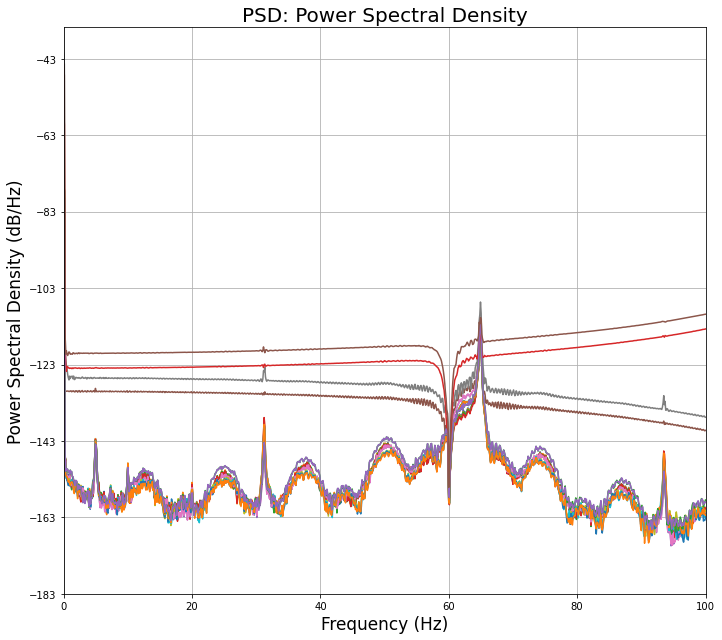

In [17]:
# PSD Filtered ##
plt.figure(figsize=(10, 9));
for i in range(channum):
    plt.psd(fdata_Y[i],NFFT=round(N/10),Fs=Fs);

plt.title('PSD: Power Spectral Density',fontsize=20);
plt.xlabel('Frequency (Hz)',fontsize=17);
plt.ylabel('Power Spectral Density (dB/Hz)',fontsize=17);
plt.tight_layout();
plt.xlim((0,100));
plt.show();